In [1]:
# Define valid file extensions
valid_extensions = ['.wav', '.m4a', '.mp3']  # Add more extensions if needed

In [2]:
import os

# Initialize a list with the specific file paths
files = [
    r'D:\DeepLearning-Project (virtual-env)\real.wav',
    r'D:\DeepLearning-Project (virtual-env)\Target.wav',
    r'D:\DeepLearning-Project (virtual-env)\fake.m4a',
    r'D:\DeepLearning-Project (virtual-env)\recordings\ann\ann_recording.wav',
    r'D:\DeepLearning-Project (virtual-env)\DeepfakeDetection\Ananya_recording.wav'
]

# Create the dictionary with file paths as keys and file names as values
demo = {file_path: os.path.basename(file_path) for file_path in files}

# Print the demo dictionary
print("Demo set:", demo)

Demo set: {'D:\\DeepLearning-Project (virtual-env)\\real.wav': 'real.wav', 'D:\\DeepLearning-Project (virtual-env)\\Target.wav': 'Target.wav', 'D:\\DeepLearning-Project (virtual-env)\\fake.m4a': 'fake.m4a', 'D:\\DeepLearning-Project (virtual-env)\\recordings\\ann\\ann_recording.wav': 'ann_recording.wav', 'D:\\DeepLearning-Project (virtual-env)\\DeepfakeDetection\\Ananya_recording.wav': 'Ananya_recording.wav'}


--------------------------------------------------------------------------------------
Computing histogram: real.wav


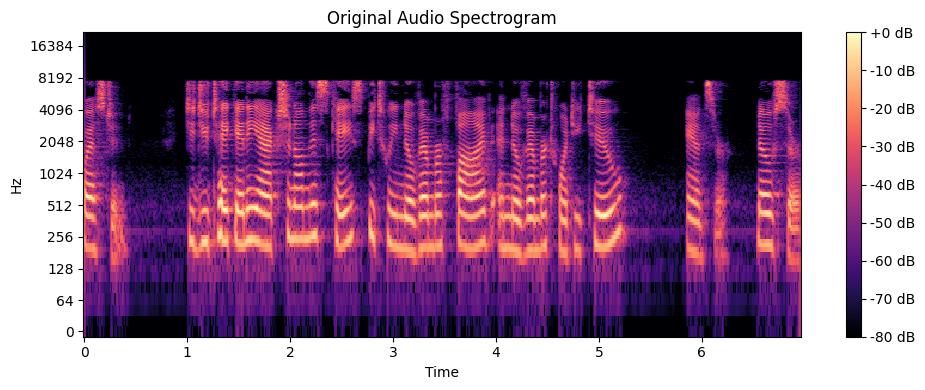

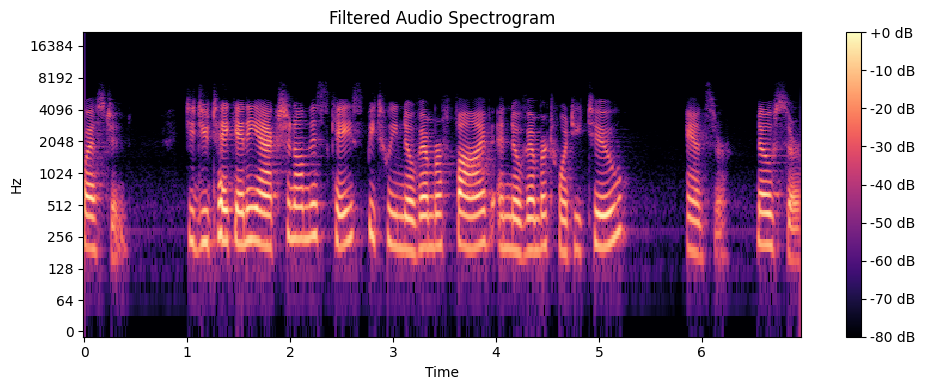

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
Computing histogram: Target.wav


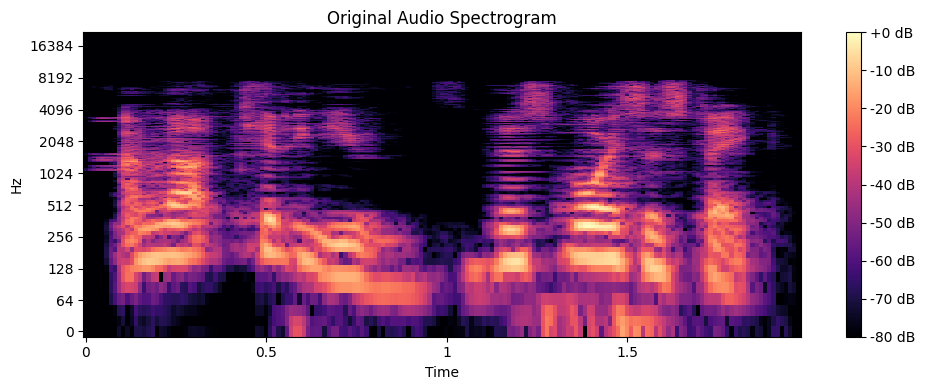

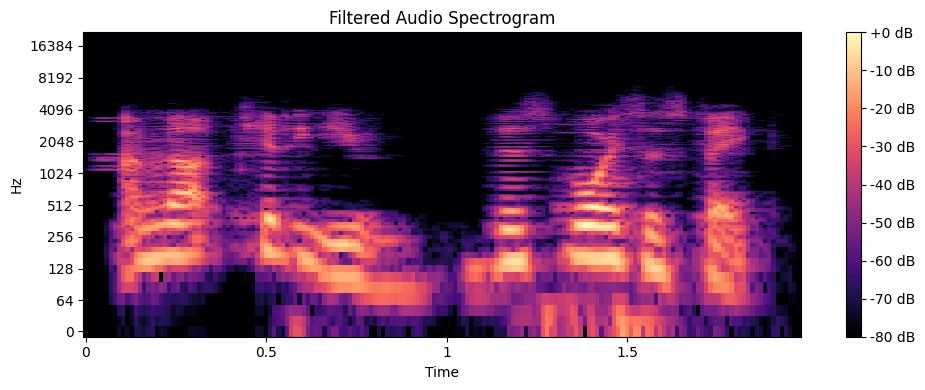

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
Computing histogram: fake.m4a


C:\Users\anany\AppData\Local\Temp\ipykernel_53684\2279449744.py:32: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sr = librosa.load(file_path, sr=44100)
C:\Users\anany\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


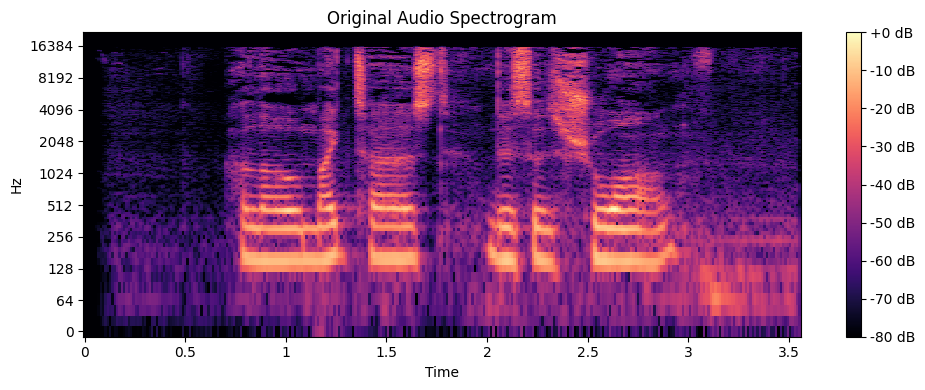

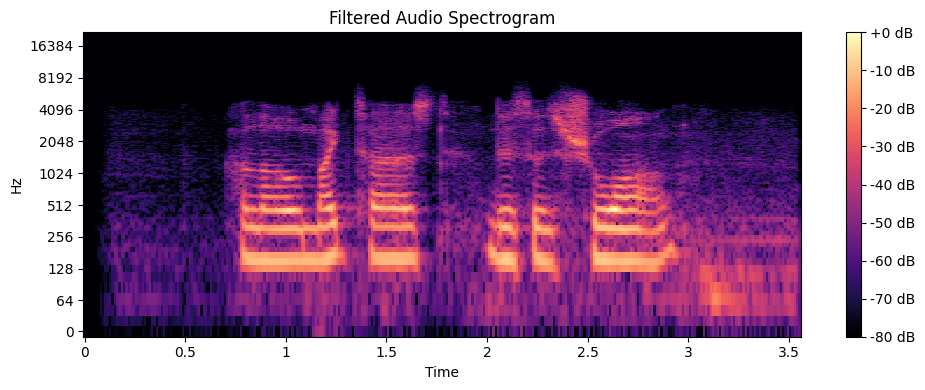

--------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------
Computing histogram: Ananya_recording.wav


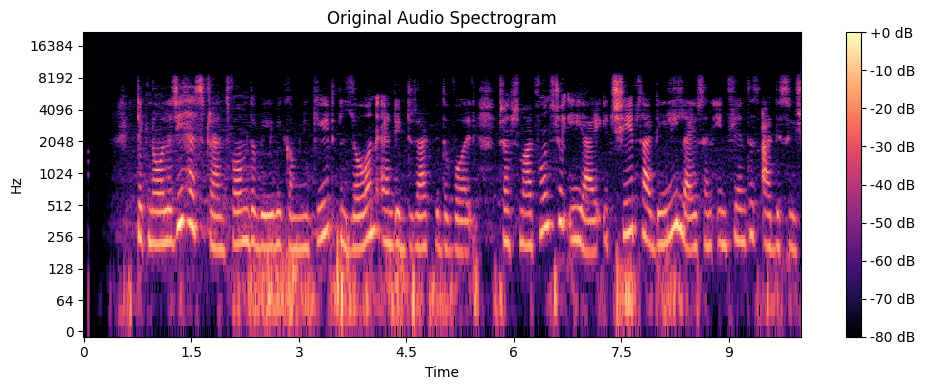

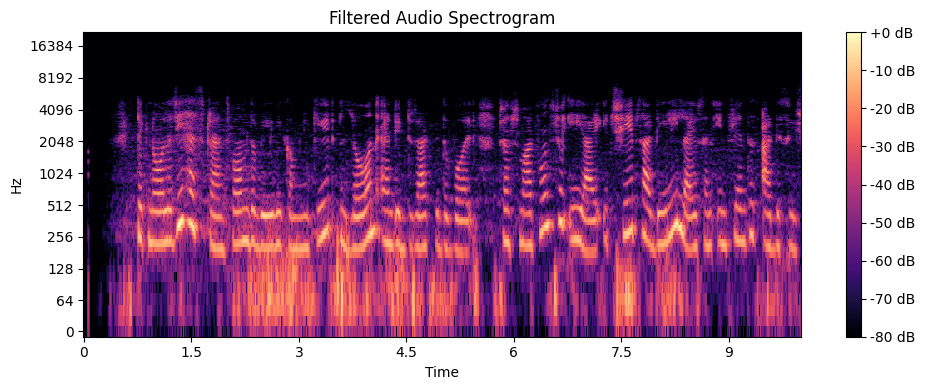

--------------------------------------------------------------------------------------



In [10]:
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
import scipy.signal

def filter(audio_data, cutoff_frequency, sr):
    # Define the filter
    nyquist_frequency = sr / 2
    cutoff_normalized = cutoff_frequency / nyquist_frequency
    b, a = scipy.signal.butter(4, cutoff_normalized, btype='low')

    # Apply the filter to each channel
    filtered_audio = np.apply_along_axis(lambda x: scipy.signal.filtfilt(b, a, x), axis=0, arr=audio_data)
    return filtered_audio

def plot_spectrogram(audio, sr, title):
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.amplitude_to_db(np.abs(librosa.stft(audio)), ref=np.max), sr=sr, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

def compute_histogram_filtered(file_path, dir="./hoto"):
    # Ensure the 'hoto' directory exists
    if not os.path.exists(dir):
        os.makedirs(dir)

    # Load audio file
    audio, sr = librosa.load(file_path, sr=44100)

    # Plot spectrogram of original audio
    plot_spectrogram(audio, sr, title='Original Audio Spectrogram')

    # Filter the audio
    cutoff_frequency = 4000
    filtered_audio = filter(audio, cutoff_frequency, sr)

    # Plot spectrogram of filtered audio
    plot_spectrogram(filtered_audio, sr, title='Filtered Audio Spectrogram')

    # Calculate histogram of filtered audio
    hist, bins = np.histogram(filtered_audio, bins=256, range=(-1, 1))  # 2^8 bins

    # Plot histogram with grayscale color
    plt.figure()
    plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), color='black')
    
    # Save histogram as PNG in grayscale
    filename = os.path.basename(file_path)
    save_path = os.path.join(dir, f'hist_{filename}.png')
    plt.savefig(save_path)  # Save without cmap here
    plt.close()  # Close plot to free memory

    return hist

# Sample dictionary with file paths for demonstration
demo = {
    "D:/DeepLearning-Project (virtual-env)/real.wav": "real.wav",
    "D:/DeepLearning-Project (virtual-env)/Target.wav": "Target.wav",
    "D:/DeepLearning-Project (virtual-env)/fake.m4a": "fake.m4a",
    "D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/Ananya_recording.wav": "Ananya_recording.wav"
}

# Iterate over items in the demo dictionary
for file_path, file_name in demo.items():
    print("--------------------------------------------------------------------------------------")
    print("Computing histogram:", file_name)
    compute_histogram_filtered(file_path, "./hoto")  # Save in the 'hoto' directory
    print("--------------------------------------------------------------------------------------\n")




In [11]:

from tensorflow.keras.models import load_model

# ---------- Load our saved model ---------- #
model_path = r'D:\DeepLearning-Project (virtual-env)\DeepfakeDetection\models\Deep4SNet-Our-HVoice_SiF-Filtered.keras'
model_our_HVoice_SiF_Filtered = load_model(model_path)

In [ ]:
from PIL import Image
import numpy as np

# List of image file paths
image_paths = [
    'D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_Ananya_recording.wav.png',
    'D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_fake.m4a.png',
    'D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_real.wav.png',
    'D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_Target.wav.png'
]

# Resize images to the required input shape of the model
resized_images = []
for image_path in image_paths:
    # Load and convert image to grayscale (1 channel)
    image = Image.open(image_path).convert('L')
    resized_image = image.resize((150, 150))  # Ensure this matches model input shape
    image_array = np.array(resized_image)
    resized_images.append(image_array)

# Convert list of resized images to numpy array (batch format) and add an extra dimension for channels
resized_images = np.array(resized_images)[..., np.newaxis]

# Ensure model is loaded (replace 'YourModelClass' and 'path_to_weights.h5' as needed)
# model_our_HVoice_SiF_Filtered = YourModelClass()
# model_our_HVoice_SiF_Filtered.load_weights('path_to_weights.h5')

# Make predictions
predictions = model_our_HVoice_SiF_Filtered.predict(resized_images)

# Interpret predictions
class_labels = ['fake', 'real']
for i, prediction in enumerate(predictions):
    predicted_class_index = np.argmax(prediction)  # Gets the class index with the highest probability
    predicted_class_label = class_labels[predicted_class_index]
    print(f'{image_paths[i]} --- Predict: {predicted_class_label}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_Ananya_recording.wav.png --- Predict: fake
D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_fake.m4a.png --- Predict: fake
D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_real.wav.png --- Predict: fake
D:/DeepLearning-Project (virtual-env)/DeepfakeDetection/hoto/hist_Target.wav.png --- Predict: fake
